In [1]:
import math

# Summation Unit: Computes the weighted sum of the inputs
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))

# Step Function: Returns 1 if the input is greater than or equal to 0, else returns 0
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function: Returns 1 if the input is greater than or equal to 0, else returns -1
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function: Maps input to a value between 0 and 1
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# TanH Function: Maps input to a value between -1 and 1
def tanh(x):
    return math.tanh(x)

# ReLU (Rectified Linear Unit) Function: Returns input if positive, else returns 0
def relu(x):
    return max(0, x)

# Leaky ReLU Function: Returns input if positive, else returns a small value proportional to the input (alpha * x)
def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Error Calculation: Returns the difference between the actual value and the predicted value
def error_calculation(predicted, actual):
    return actual - predicted


Final Weights: [-0.10000000000000765, 0.1000000000000001, 0.05000000000000032]
Epochs until convergence: 129


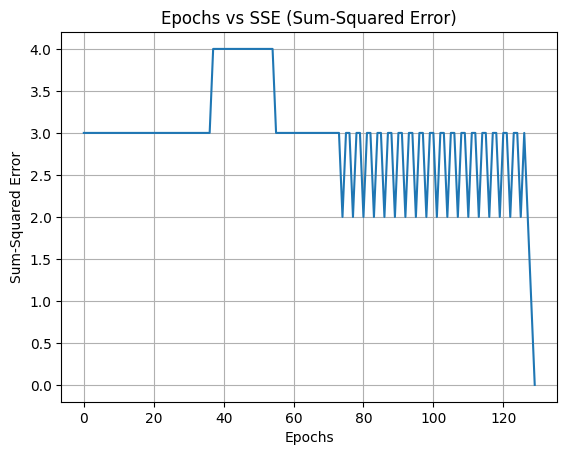

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function (used to learn AND gate logic)
def step_activation(x):
    return 1 if x >= 0 else 0

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using step activation function
            predicted = step_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Update weights and bias
            W[0] = W[0] + alpha * error  # Bias update
            W[1] = W[1] + alpha * error * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(epochs+1), errors)
plt.title("Epochs vs SSE (Sum-Squared Error)")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


Final Weights: [-0.2999999999999812, 0.19999999999999998, 0.15000000000000005]
Epochs until convergence: 67


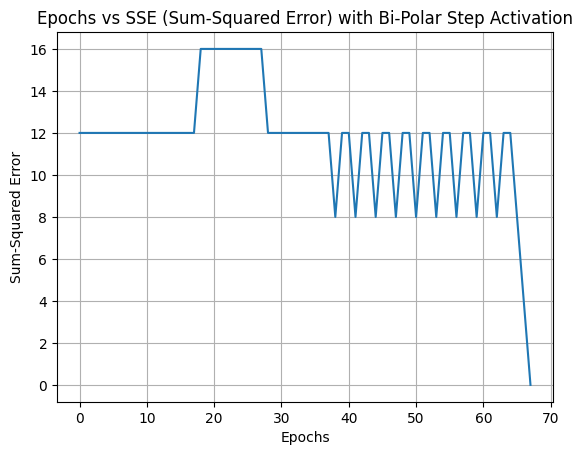

In [3]:
#bipolar
import numpy as np
import matplotlib.pyplot as plt

# Bi-Polar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using bipolar step activation function
            predicted = bipolar_step_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Update weights and bias
            W[0] = W[0] + alpha * error  # Bias update
            W[1] = W[1] + alpha * error * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs for Bi-Polar AND logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([-1, -1, -1, 1])  # Bi-Polar AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(epochs+1), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with Bi-Polar Step Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


Final Weights: [9.991014567952307, 0.1981319024231986, -0.7548371371076595]
Epochs until convergence: 1000


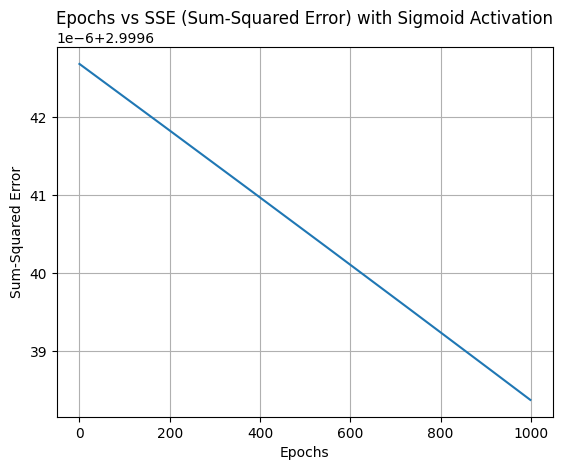

In [4]:
#Sigmod function
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using sigmoid activation function
            predicted = sigmoid_activation(summation)
            # Calculate error (as the difference between expected and predicted output)
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # Sigmoid gradient for weight update
            gradient = predicted * (1 - predicted)
            
            # Update weights and bias using the error and gradient
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron using sigmoid activation
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(len(errors)), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with Sigmoid Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()



Final Weights: [2.678035481829845e-22, -2.3287326985043952, -2.8725635474985998]
Epochs until convergence: 1000


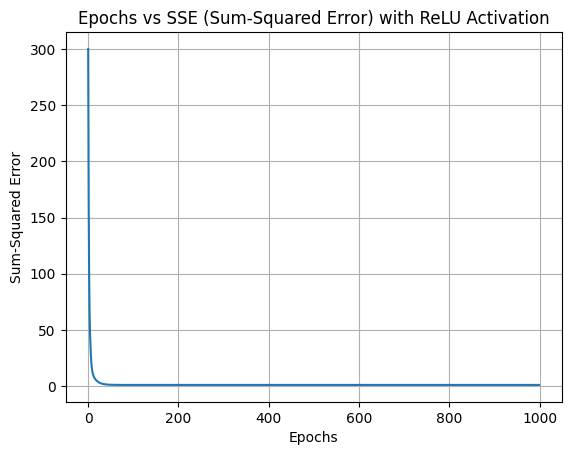

In [5]:
#ReLU
import numpy as np
import matplotlib.pyplot as plt

# ReLU Activation Function
def relu_activation(x):
    return max(0, x)

# Derivative of ReLU function for weight update
def relu_derivative(x):
    return 1 if x > 0 else 0

# Perceptron Training Function
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            # Get the prediction using ReLU activation function
            predicted = relu_activation(summation)
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # ReLU derivative for weight update
            gradient = relu_derivative(summation)
            
            # Update weights and bias using the error and gradient
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set learning rate and max epochs
alpha = 0.05  # Learning rate
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Train the perceptron using ReLU activation
final_weights, epochs, errors = train_perceptron(X, y, W, alpha, max_epochs, error_threshold)

# Print final weights and number of epochs
print(f"Final Weights: {final_weights}")
print(f"Epochs until convergence: {epochs}")

# Plotting Epochs vs SSE (Sum Squared Error)
plt.plot(range(len(errors)), errors)
plt.title("Epochs vs SSE (Sum-Squared Error) with ReLU Activation")
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.grid(True)
plt.show()


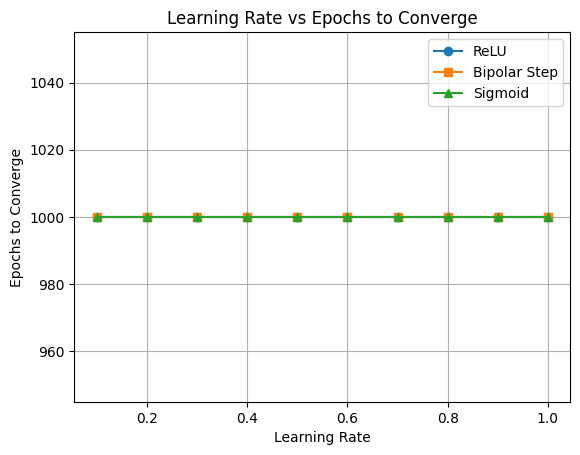

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU Activation Function and its derivative
def relu_activation(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0

# Bipolar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x > 0 else -1

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid for weight update
def sigmoid_derivative(x):
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))

# Perceptron Training Function (supports different activation functions)
def train_perceptron(X, y, W, alpha, max_epochs, error_threshold, activation_function, derivative_function=None):
    epochs = 0
    errors_per_epoch = []
    
    while epochs < max_epochs:
        total_error = 0
        
        for i in range(len(X)):
            # Compute weighted sum (W0 is bias term)
            summation = W[0] + W[1] * X[i][0] + W[2] * X[i][1]
            
            # Get the prediction using the selected activation function
            predicted = activation_function(summation)
            
            # Calculate error
            error = y[i] - predicted
            total_error += error ** 2  # Sum of squared errors (SSE)
            
            # For differentiable functions like Sigmoid and ReLU
            gradient = derivative_function(summation) if derivative_function else 1
            
            # Update weights and bias
            W[0] = W[0] + alpha * error * gradient  # Bias update
            W[1] = W[1] + alpha * error * gradient * X[i][0]  # Weight for input X1
            W[2] = W[2] + alpha * error * gradient * X[i][1]  # Weight for input X2
        
        # Append the total error for this epoch
        errors_per_epoch.append(total_error)
        
        # Check if error has converged
        if total_error <= error_threshold:
            break
        
        epochs += 1
    
    return W, epochs, errors_per_epoch

# AND gate input (X1, X2) and corresponding outputs (AND logic for binary values 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate output

# Initialize weights (W0 = bias, W1 = weight for X1, W2 = weight for X2)
initial_W = [10, 0.2, -0.75]  # [W0, W1, W2]

# Set the max epochs and error threshold
max_epochs = 1000
error_threshold = 0.002  # Convergence criteria for SSE

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize dictionaries to store epochs for each activation function
epochs_to_converge_relu = []
epochs_to_converge_bipolar = []
epochs_to_converge_sigmoid = []

# Train the perceptron for each learning rate for each activation function
for alpha in learning_rates:
    # ReLU Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, relu_activation, relu_derivative)
    epochs_to_converge_relu.append(epochs)
    
    # Bipolar Step Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, bipolar_step_activation)
    epochs_to_converge_bipolar.append(epochs)
    
    # Sigmoid Activation
    W = initial_W.copy()  # Reset weights
    final_weights, epochs, _ = train_perceptron(X, y, W, alpha, max_epochs, error_threshold, sigmoid_activation, sigmoid_derivative)
    epochs_to_converge_sigmoid.append(epochs)

# Plot the learning rate vs number of epochs for convergence for all activations
plt.plot(learning_rates, epochs_to_converge_relu, marker='o', label="ReLU")
plt.plot(learning_rates, epochs_to_converge_bipolar, marker='s', label="Bipolar Step")
plt.plot(learning_rates, epochs_to_converge_sigmoid, marker='^', label="Sigmoid")
plt.title("Learning Rate vs Epochs to Converge")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.legend()
plt.grid(True)
plt.show()


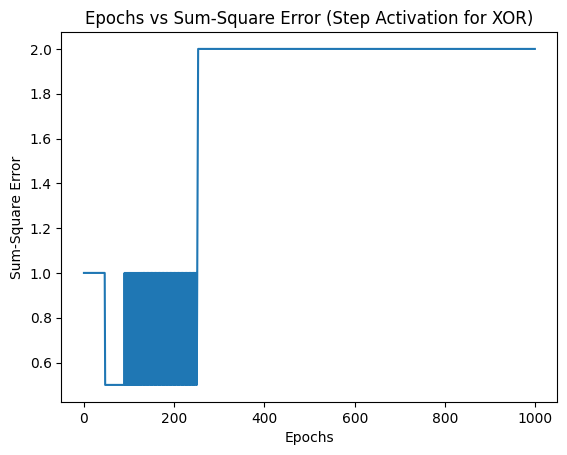

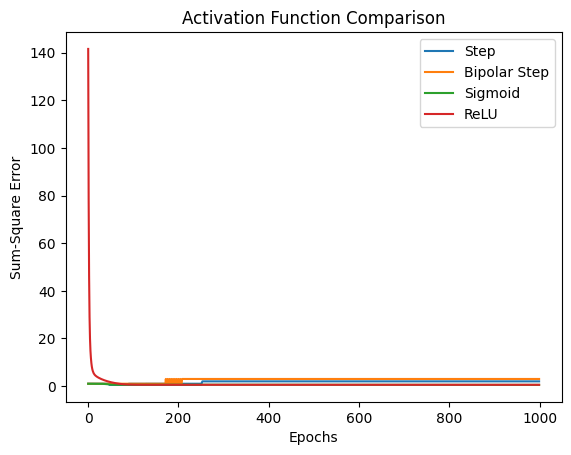

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Summation unit
def summation_unit(weights, inputs):
    return sum(w * i for w, i in zip(weights, inputs))

# Step Activation Function
def step_activation(x):
    return 1 if x >= 0 else 0

# Bipolar Step Activation Function
def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

# Sigmoid Activation Function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# TanH Activation Function
def tanh_activation(x):
    return np.tanh(x)

# ReLU Activation Function
def relu_activation(x):
    return max(0, x)

# Leaky ReLU Activation Function
def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Error calculation
def calculate_error(expected, output):
    return expected - output

# Sum-squared error calculation
def sum_square_error(errors):
    return sum(e**2 for e in errors) / 2

# Perceptron algorithm
def perceptron(X, y, activation_func, weights, epochs=1000, lr=0.05, convergence_error=0.002):
    epoch_errors = []
    for epoch in range(epochs):
        errors = []
        for inputs, target in zip(X, y):
            summation = summation_unit(weights, inputs)
            output = activation_func(summation)
            error = calculate_error(target, output)
            errors.append(error)
            # Update weights
            weights = [w + lr * error * inp for w, inp in zip(weights, inputs)]
        
        # Sum-squared error for this epoch
        sse = sum_square_error(errors)
        epoch_errors.append(sse)
        
        # Check for convergence
        if sse <= convergence_error:
            print(f"Converged after {epoch+1} epochs.")
            break
    
    return weights, epoch_errors

# Input data for XOR problem
X = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
y = [0, 1, 1, 0]
initial_weights = [10, 0.2, -0.75]

# Step Activation
weights, epoch_errors = perceptron(X, y, step_activation, initial_weights)

# Plot the errors for Step Activation
plt.plot(range(len(epoch_errors)), epoch_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs Sum-Square Error (Step Activation for XOR)')
plt.show()

# For Bipolar Step
weights_bipolar, epoch_errors_bipolar = perceptron(X, y, bipolar_step_activation, initial_weights)

# For Sigmoid
weights_sigmoid, epoch_errors_sigmoid = perceptron(X, y, sigmoid_activation, initial_weights)

# For ReLU
weights_relu, epoch_errors_relu = perceptron(X, y, relu_activation, initial_weights)

# Plot activation function comparison
plt.plot(range(len(epoch_errors)), epoch_errors, label="Step")
plt.plot(range(len(epoch_errors_bipolar)), epoch_errors_bipolar, label="Bipolar Step")
plt.plot(range(len(epoch_errors_sigmoid)), epoch_errors_sigmoid, label="Sigmoid")
plt.plot(range(len(epoch_errors_relu)), epoch_errors_relu, label="ReLU")
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Activation Function Comparison')
plt.legend()
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron forward pass (prediction)
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

# Function to update weights and bias (gradient descent)
def update_weights(X, y_true, y_pred, weights, bias, learning_rate):
    error = y_true - y_pred
    # Reshape error to match the dimensions correctly
    weights += learning_rate * error * X
    bias += learning_rate * error
    return weights, bias

# Perceptron training function
def train_perceptron(X_train, y_train, weights, bias, learning_rate, n_epochs):
    for epoch in range(n_epochs):
        for i in range(len(X_train)):
            # Get prediction for each training instance
            y_pred = predict(X_train[i], weights, bias)
            # Update weights and bias
            weights, bias = update_weights(X_train[i], y_train[i], y_pred, weights, bias, learning_rate)
    return weights, bias

# Evaluate the perceptron on test data
def evaluate(X_test, y_test, weights, bias):
    correct_predictions = 0
    for i in range(len(X_test)):
        y_pred = predict(X_test[i], weights, bias)
        y_pred_class = 1 if y_pred > 0.5 else 0
        if y_pred_class == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test)
    return accuracy

# Manually creating the dataset from the provided table
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 1, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value Tx'].values

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.random.rand(n_features)
bias = np.random.rand(1)
learning_rate = 0.01
n_epochs = 1000

# Train the perceptron
weights, bias = train_perceptron(X_train, y_train, weights, bias, learning_rate, n_epochs)

# Evaluate the model
accuracy = evaluate(X_test, y_test, weights, bias)
print(f"Perceptron classification accuracy: {accuracy * 100:.2f}%")


Perceptron classification accuracy: 50.00%


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import pinv

# Manually creating the dataset from the provided table
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 1, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx': [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Candies', 'Mangoes', 'Milk Packets', 'Payment']].values
y = df['High Value Tx'].values

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Append bias term (column of ones) to the features
X_train_bias = np.c_[X_train, np.ones(X_train.shape[0])]
X_test_bias = np.c_[X_test, np.ones(X_test.shape[0])]

# Compute the weights using pseudo-inverse
weights_pseudo_inverse = np.dot(pinv(X_train_bias), y_train)

# Function to evaluate the pseudo-inverse model
def evaluate_pseudo_inverse(X_test_bias, y_test, weights):
    correct_predictions = 0
    y_preds = []
    for i in range(len(X_test_bias)):
        y_pred = np.dot(X_test_bias[i], weights)
        y_pred_class = 1 if y_pred > 0.5 else 0
        y_preds.append(y_pred_class)
        if y_pred_class == y_test[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(X_test_bias)
    return accuracy

# Evaluate pseudo-inverse solution
accuracy_pseudo_inverse = evaluate_pseudo_inverse(X_test_bias, y_test, weights_pseudo_inverse)
print(f"Pseudo-inverse classification accuracy: {accuracy_pseudo_inverse * 100:.2f}%")


Pseudo-inverse classification accuracy: 50.00%
